<a href="https://colab.research.google.com/github/liliakurghinyan/sales_task/blob/main/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline

First let's look at the tasks that we have.

Analyze a dataset to uncover trends, insights, and patterns that can help improve business decision-making. Additionally, create a synthetic dataset representing daily total sales by store and department.

Steps:

Data Cleaning:

Identify and handle missing values.
Standardize column names and formats (e.g., dates, currencies).
Remove duplicates and irrelevant columns.

Exploratory Data Analysis (EDA):

Provide a summary of the dataset.
Identify trends, correlations, and outliers.
Visualize key data points using charts.

Business Insights:

Identify the top 3 insights that could help improve the business.
Support findings with data and visuals.

# **Data Cleaning**

Before merging 3 data sources to have a new dataset, which will be more comfortable and easy to use, we must do data cleaning. Let's look for missing values, duplicated values, datatypes and so on.

In [2]:
#importing data
file_path = '/content/Data.xlsx'
excel_data = pd.ExcelFile(file_path)

df_source1 = excel_data.parse('Source 1')
df_source2 = excel_data.parse('Source 2')
df_data2 = excel_data.parse('data 2')

Now let's analyze each df starting with df_source1.

In [3]:
df_source1.head()

,date,store,upc,retail_price
0,2024-12-21,473,9999312,603.36
1,2024-12-21,471,9999312,603.36
2,2024-12-21,493,9999312,603.36
3,2024-12-21,493,9999312,603.36
4,2024-12-21,471,9999312,603.36


In [4]:
df_source1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28098 entries, 0 to 28097
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          28098 non-null  object 
 1   store         28098 non-null  int64  
 2   upc           28098 non-null  int64  
 3   retail_price  25892 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 878.2+ KB


as we can see, we have 28098 records, and some missing values in retail_price column, let's analyze column, and decide how to handle those values.

In [5]:
df_source1['retail_price'].describe()

,retail_price
count,25892.000000
mean,3.062429
std,14.497790
min,-8.000000
25%,1.000000
50%,1.000000
75%,3.290000
max,603.360000


In [6]:
df_source1['retail_price'].isna().sum()

2206

we can handle those 2206 missing values by assigning them the mean of the column.

In [7]:
df_source1['retail_price'].fillna(df_source1['retail_price'].mean(), inplace=True)

<ipython-input-7-d53fd8a1eabd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_source1['retail_price'].fillna(df_source1['retail_price'].mean(), inplace=True)


Now let's check for duplicated values

In [8]:
df_source1.duplicated().sum()

913

In [9]:
df_source1.drop_duplicates(keep = 'first',inplace=True)

In [10]:
df_source1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27185 entries, 0 to 28097
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          27185 non-null  object 
 1   store         27185 non-null  int64  
 2   upc           27185 non-null  int64  
 3   retail_price  27185 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.0+ MB


now let's convert 'date' column's type to datetime in these 2 dataframes

In [11]:
df_source1['date'] = pd.to_datetime(df_source1['date'])
df_source2['date'] = pd.to_datetime(df_source2['date'])

next step : analyzing df_source2

In [12]:
df_source2.head()

,date,store,upc,family_code,price_type,unit_price,unit_cost
0,2024-12-20,493,7084781116,1432,R,3.39,-0.1
1,2024-12-18,470,7084781116,1432,R,3.69,-0.1
2,2024-12-24,493,7084781116,1432,R,3.39,-0.1
3,2024-12-21,470,7084781116,1432,R,3.39,-0.1
4,2024-12-23,470,7084781116,1432,R,3.39,-0.1


In [13]:
df_source2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28098 entries, 0 to 28097
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         28098 non-null  datetime64[ns]
 1   store        28098 non-null  int64         
 2   upc          28098 non-null  int64         
 3   family_code  28098 non-null  object        
 4   price_type   9366 non-null   object        
 5   unit_price   14478 non-null  float64       
 6   unit_cost    14478 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.5+ MB


There is lot of more things here to do.


price_type,unit_price,unit_cost, decide how to handle missing data correctly

now let's look for duplicated values, and drop them

In [14]:
df_source2.duplicated().sum()

2824

In [15]:
df_source2.drop_duplicates(keep = 'first', inplace = True)

for handling this kind of data I searched for a formula for unit cost and unit price, but beside retail price, they also required margin percentage, which we don't have in our data.

In [16]:
df_source2['family_code'].isna().sum()

0

problem : it shows that it does not have missing values,but all we see are blank blocks, blocks are not empty, they are filled with whitespaces, so we need to cut all whitespaces out, and then try to convert family_code to numeric, but it's nessecary to keep them as a string type, because the codes can begin with zeros. so we just need to handle missing values.

In [17]:
df_source2['family_code'].replace('    ',np.nan,inplace=True)

<ipython-input-17-e45ad1a00fd6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_source2['family_code'].replace('    ',np.nan,inplace=True)


In [18]:
df_source2['family_code'].isna().sum()

4406

In [19]:
#there are some items, thats family_code is Nan, but maybe somewhere in data, there are records with same upc's, and we can assign them to missing values
def find_family_code(ucp):
  match = df_source2[(df_source2['upc'] == ucp) & (df_source2['family_code'].notna())]

  if not match.empty:
    return match['family_code']
  else:
    return np.nan




In [20]:
df_source2['family_code'] = df_source2.apply(
    lambda row: find_family_code(row['upc']) if pd.isna(row['family_code']) else row['family_code'],
    axis=1)

In [21]:
df_source2[df_source2['family_code'].isna()]

,date,store,upc,family_code,price_type,unit_price,unit_cost
27,2024-12-23,474,7003858266,NaN,R,2.19,-0.28
28,2024-12-23,470,7003858266,NaN,R,2.19,-0.28
29,2024-12-23,471,7003858266,NaN,R,2.19,-0.28
30,2024-12-23,473,7003858266,NaN,R,2.19,-0.28
31,2024-12-24,474,7003858266,NaN,R,2.19,-0.28
...,...,...,...,...,...,...,...
28038,2024-12-22,66,22964800000,NaN,R,7.99,6.21
28039,2024-12-23,65,22964800000,NaN,R,7.99,6.21
28040,2024-12-23,66,22964800000,NaN,R,7.99,6.21
28041,2024-12-24,65,22964800000,NaN,R,7.99,6.21


In [22]:
df_source2[df_source2['upc']==7003858266]

,date,store,upc,family_code,price_type,unit_price,unit_cost
27,2024-12-23,474,7003858266,NaN,R,2.19,-0.28
28,2024-12-23,470,7003858266,NaN,R,2.19,-0.28
29,2024-12-23,471,7003858266,NaN,R,2.19,-0.28
30,2024-12-23,473,7003858266,NaN,R,2.19,-0.28
31,2024-12-24,474,7003858266,NaN,R,2.19,-0.28
32,2024-12-24,66,7003858266,NaN,R,2.19,-0.28
33,2024-12-24,461,7003858266,NaN,R,2.19,-0.28
34,2024-12-24,470,7003858266,NaN,R,2.19,-0.28
35,2024-12-24,472,7003858266,NaN,R,2.19,-0.28
36,2024-12-23,66,7003858266,NaN,R,2.19,-0.28


so in the end we got 4406 Nan values, there were not other record with the same upc, which would have family_code. Let's leave it how it is right now. If in the future it will be unhelpful for us, we gonna drop the records


now let's take care of unit_cost and unit_price columns.

In [23]:
df_source2[['unit_cost','unit_price']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 25274 entries, 0 to 28097
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unit_cost   13813 non-null  float64
 1   unit_price  13813 non-null  float64
dtypes: float64(2)
memory usage: 592.4 KB


**Filling missing values with the means of columns**

In [24]:
df_source2['unit_price'].fillna(df_source2['unit_price'].mean(), inplace = True)
df_source2['unit_cost'].fillna(df_source2['unit_cost'].mean(), inplace = True)

<ipython-input-24-feb79cc13713>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_source2['unit_price'].fillna(df_source2['unit_price'].mean(), inplace = True)
<ipython-input-24-feb79cc13713>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [25]:
df_source2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25274 entries, 0 to 28097
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         25274 non-null  datetime64[ns]
 1   store        25274 non-null  int64         
 2   upc          25274 non-null  int64         
 3   family_code  20868 non-null  object        
 4   price_type   8701 non-null   object        
 5   unit_price   25274 non-null  float64       
 6   unit_cost    25274 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.5+ MB


let's dive deep in price_type column (not sure about these)

T (Transactional): Refers to a transactional price, such as the actual price at which an item was sold.


R (Retail): Represents the retail price, typically the listed price for an item in a store or catalog.


A (Average): Denotes the average price, possibly calculated over a period or from multiple sources.


In [26]:
df_source2['price_type'].fillna('R', inplace=True)

<ipython-input-26-921ada8ca4cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_source2['price_type'].fillna('R', inplace=True)


In [27]:
df_source2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25274 entries, 0 to 28097
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         25274 non-null  datetime64[ns]
 1   store        25274 non-null  int64         
 2   upc          25274 non-null  int64         
 3   family_code  20868 non-null  object        
 4   price_type   25274 non-null  object        
 5   unit_price   25274 non-null  float64       
 6   unit_cost    25274 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.5+ MB


In [28]:
df_source1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27185 entries, 0 to 28097
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          27185 non-null  datetime64[ns]
 1   store         27185 non-null  int64         
 2   upc           27185 non-null  int64         
 3   retail_price  27185 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.0 MB


now let's look at the data2 df

In [29]:
df_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   upc              1897 non-null   int64  
 1   department_code  1891 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 29.8 KB


# Exploratory Data Analysis

Summary of datasets

In [30]:
df_source1.describe()

,date,store,upc,retail_price
count,27185,27185.000000,2.718500e+04,27185.000000
mean,2024-12-21 05:11:18.418245376,409.107523,1.243648e+10,2.852014
min,2024-12-18 00:00:00,65.000000,1.100000e+01,-8.000000
25%,2024-12-19 00:00:00,461.000000,2.100064e+09,1.000000
50%,2024-12-21 00:00:00,472.000000,4.400006e+09,1.000000
75%,2024-12-23 00:00:00,474.000000,7.069002e+09,3.062429
max,2024-12-24 00:00:00,493.000000,9.419199e+11,603.360000
std,NaN,149.185609,4.591158e+10,10.313845


In [31]:
df_source2.describe()

,date,store,upc,unit_price,unit_cost
count,25274,25274.000000,2.527400e+04,25274.000000,25274.000000
mean,2024-12-21 05:11:08.608055552,409.281435,1.242579e+10,4.712457,5.478711
min,2024-12-18 00:00:00,65.000000,1.100000e+01,-8.000000,-26.990000
25%,2024-12-19 00:00:00,461.000000,2.100064e+09,3.490000,3.000000
50%,2024-12-21 00:00:00,472.000000,4.400006e+09,4.712457,5.478711
75%,2024-12-23 00:00:00,474.000000,7.064002e+09,4.712457,5.478711
max,2024-12-24 00:00:00,493.000000,9.419199e+11,99.690000,418.560000
std,NaN,149.024570,4.601335e+10,3.357886,8.711650


In [32]:
df_data2.describe()

,upc,department_code
count,1.897000e+03,1891.000000
mean,1.657539e+10,29.957166
std,4.613947e+10,14.897809
min,1.100000e+01,1.000000
25%,2.800030e+09,31.000000
50%,4.400006e+09,32.000000
75%,7.402610e+09,33.000000
max,9.419199e+11,81.000000


Task 1: Analyze sales trends over time.


<Axes: title={'center': 'Daily Sales Trends'}, xlabel='date'>

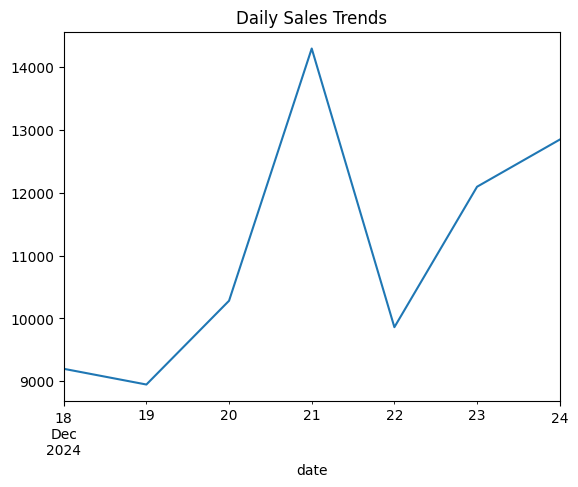

In [33]:
df_source1.groupby('date')['retail_price'].sum().plot(kind='line',title='Daily Sales Trends')

so we see that, in 21th of December, we have the most of daily sales.

Let's look to Store Perforance.

In [34]:
df_source1['store'].unique().sum()

3922

<Axes: title={'center': 'Sales by Store'}, xlabel='Store', ylabel='Sales by store'>

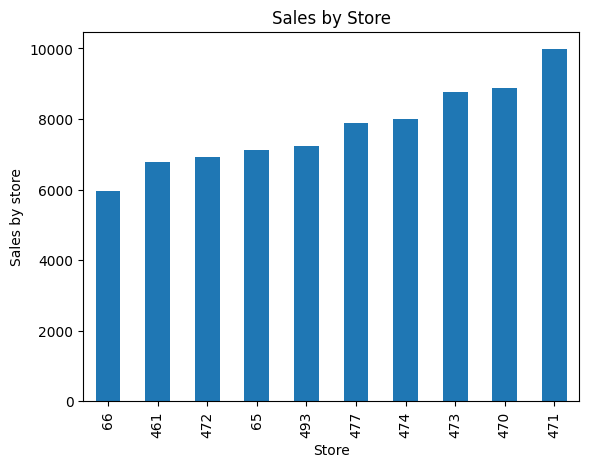

In [35]:
df_source1.groupby('store')['retail_price'].sum().sort_values().plot(kind='bar', title='Sales by Store', xlabel = 'Store', ylabel='Sales by store')

Now let's look and find outliers, and make a new dataset, where we will include retail price, umit cost and price, departement code , store and so on.

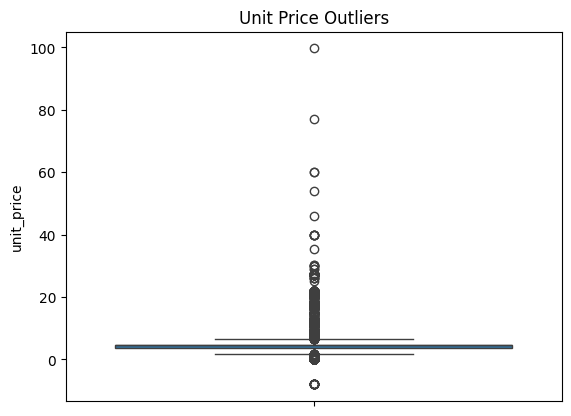

In [36]:
sns.boxplot(df_source2['unit_price'])
plt.title('Unit Price Outliers')
plt.show()

we also can use Z score for finding outliers

In [37]:
df_source2['zscore_unit_price']= zscore(df_source2['unit_price'])
outliers = df_source2[df_source2['zscore_unit_price'].abs()>3]

In [38]:
outliers

,date,store,upc,family_code,price_type,unit_price,unit_cost,zscore_unit_price
762,2024-12-20,470,1820096715,0000,R,27.49,23.25,6.783433
763,2024-12-19,474,1820096715,0000,R,27.49,23.45,6.783433
764,2024-12-19,473,1820096715,0000,R,27.49,23.45,6.783433
765,2024-12-18,474,1820096715,0000,R,27.49,23.45,6.783433
766,2024-12-18,66,1820096715,0000,R,27.49,24.25,6.783433
...,...,...,...,...,...,...,...,...
28024,2024-12-23,470,8066095715,NaN,T,16.99,13.20,3.656404
28025,2024-12-24,66,8066095715,NaN,T,17.39,13.60,3.775529
28026,2024-12-24,470,8066095715,NaN,T,16.99,13.20,3.656404
28027,2024-12-24,474,8066095715,NaN,T,16.49,13.20,3.507497


Now let's join datasets, records of each datasets are not equal, so, we need to merge only that records , that have same upc.

In [39]:
source2 = df_source2[['upc', 'family_code', 'price_type', 'unit_price', 'unit_cost']]

In [40]:
merged1 = pd.merge(df_source1, source2, on = 'upc', how = 'outer')

In [41]:
merged1.duplicated().sum()

1120887

In [42]:
merged1.drop_duplicates(keep = 'first', inplace = True)

In [43]:
merged1['family_code'].isna().sum()

10968

let's drop all records with missing family_code values

In [44]:
merged1.dropna(subset=['family_code'], inplace=True)

now let's merge merged1 df with df_data2

In [45]:
final_dataset = pd.merge(merged1, df_data2, on = 'upc', how = 'outer')

In [46]:
final_dataset.head()

,date,store,upc,retail_price,family_code,price_type,unit_price,unit_cost,department_code
0,NaT,NaN,11,NaN,NaN,NaN,NaN,NaN,62.0
1,NaT,NaN,80,NaN,NaN,NaN,NaN,NaN,32.0
2,NaT,NaN,600,NaN,NaN,NaN,NaN,NaN,31.0
3,2024-12-22,461.0,961,39.99,2617,T,29.99,31.28,81.0
4,2024-12-22,461.0,961,39.99,2617,R,39.99,31.28,81.0


In [47]:
filtered_dataset = final_dataset[final_dataset['department_code'].notna()]

filtered_dataset = final_dataset.dropna(subset=['department_code'])

In [48]:
filtered_dataset.dropna(inplace = True)

<ipython-input-48-15b3be8716b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset.dropna(inplace = True)


In [49]:
filtered_dataset

,date,store,upc,retail_price,family_code,price_type,unit_price,unit_cost,department_code
3,2024-12-22,461.0,961,39.990000,2617,T,29.990000,31.280000,81.0
4,2024-12-22,461.0,961,39.990000,2617,R,39.990000,31.280000,81.0
5,2024-12-20,471.0,961,39.990000,2617,T,29.990000,31.280000,81.0
6,2024-12-20,471.0,961,39.990000,2617,R,39.990000,31.280000,81.0
7,2024-12-20,472.0,961,39.990000,2617,T,29.990000,31.280000,81.0
...,...,...,...,...,...,...,...,...,...
42122,2024-12-21,471.0,941919903294,1.790000,0000,R,0.000000,0.000000,46.0
42123,2024-12-21,471.0,941919903294,1.000000,0000,R,4.712457,5.478711,46.0
42124,2024-12-21,471.0,941919903294,1.000000,0000,R,0.000000,0.000000,46.0
42125,2024-12-21,471.0,941919903294,3.062429,0000,R,4.712457,5.478711,46.0


as we have our new dataset that consist everything which we need in it, let's continue our analysis and data visualization

Department Performance
Analyze which departments generate the most sales

<Axes: title={'center': 'Sales by Department'}, xlabel='department_code'>

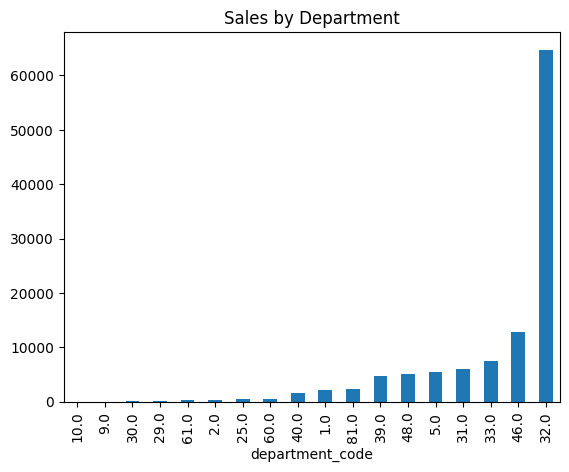

In [50]:
filtered_dataset.groupby('department_code')['retail_price'].sum().sort_values().plot(kind='bar', title = 'Sales by Department')

so department under department_code 32 does most of sales.

# **Correlation Analysis**

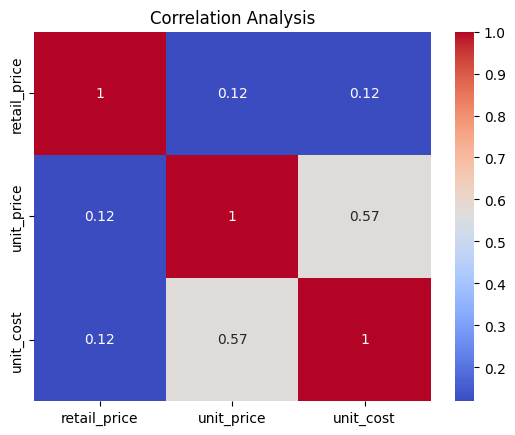

In [51]:
correlation = filtered_dataset[['retail_price', 'unit_price', 'unit_cost']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title('Correlation Analysis')
plt.show()


<Axes: title={'center': 'Sales by Price Type'}, xlabel='price_type'>

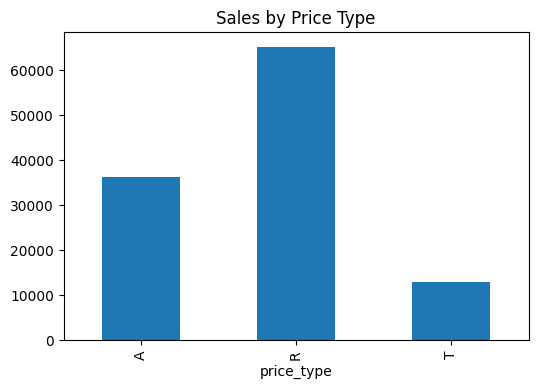

In [52]:
filtered_dataset.groupby('price_type')['retail_price'].sum().plot(kind='bar', title='Sales by Price Type', figsize = (6,4))

Profit Margin analysis

Profit margin is a financial metric that shows the percentage of revenue that remains as profit after all expenses have been deducted. It helps measure how efficiently a company is managing its costs relative to its revenue.



In [53]:
filtered_dataset['profit_margin'] = filtered_dataset['unit_price'] - filtered_dataset['unit_cost']
filtered_dataset['profit_margin']

<ipython-input-53-d007ae2bcb8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['profit_margin'] = filtered_dataset['unit_price'] - filtered_dataset['unit_cost']


,profit_margin
3,-1.290000
4,8.710000
5,-1.290000
6,8.710000
7,-1.290000
...,...
42122,0.000000
42123,-0.766254
42124,0.000000
42125,-0.766254


 Determine which departments contribute the most to revenue or have the highest profit margins.

 Group the data by department_code and calculate total sales and average profit margin for each department.
Sort by total sales or profit margin to identify top-performing departments.

In [54]:
department_analysis = filtered_dataset.groupby('department_code').agg({
  'unit_price': 'sum',
  'profit_margin': 'mean'
}).reset_index()

#rename columns
department_analysis.rename(columns = {'unit_price':'total_sales', 'profit_margin': 'avg_profit_margin'}, inplace= True)

#sort by total sales
top_departments = department_analysis.sort_values(by='total_sales', ascending=False).head(3)

top_departments

,department_code,total_sales,avg_profit_margin
9,32.0,86684.823699,0.153091
13,46.0,26999.293609,0.787093
10,33.0,15033.273166,0.018562


Visualization

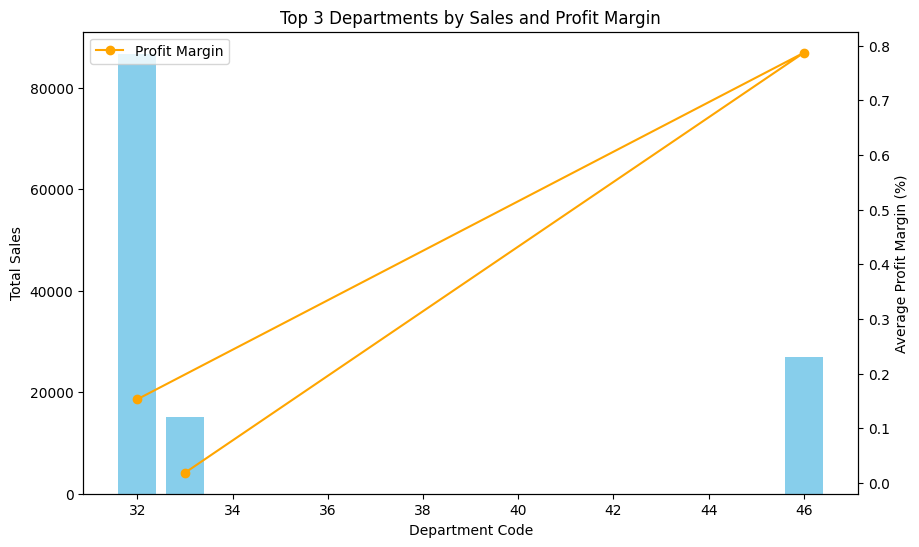

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(top_departments['department_code'],top_departments['total_sales'], color = 'skyblue')
plt.xlabel('Department Code')
plt.ylabel('Total Sales')
plt.twinx()
plt.plot(top_departments['department_code'], top_departments['avg_profit_margin'], color = 'orange', marker = 'o', label = 'Profit Margin')
plt.ylabel('Average Profit Margin (%)')
plt.title('Top 3 Departments by Sales and Profit Margin')
plt.legend()
plt.show()

Insight: Price type impact on profit margin.

Let's group by data by price_type, and calculate the average profit margin for each category. Highlight which price type offers the best profability.

In [56]:
price_type_analysis = filtered_dataset.groupby('price_type')['profit_margin'].mean().reset_index()
price_type_analysis.rename(columns = {'profit_margin':'avg_profit_margin'}, inplace= True)
price_type_analysis

,price_type,avg_profit_margin
0,A,0.163857
1,R,0.113068
2,T,-1.791658


let's use a bar plot to compare avg_profit_margin between categories

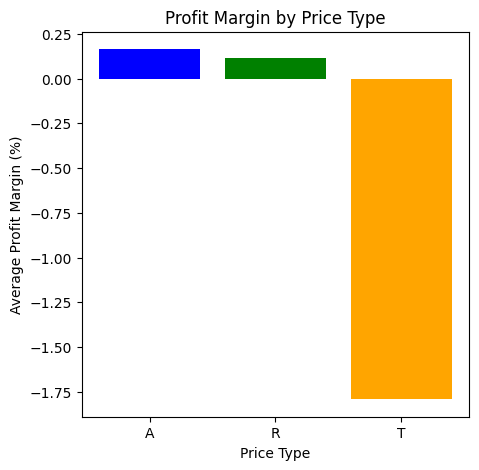

In [57]:
plt.figure(figsize=(5, 5))
plt.bar(price_type_analysis['price_type'], price_type_analysis['avg_profit_margin'], color=['blue', 'green', 'orange'])
plt.xlabel('Price Type')
plt.ylabel('Average Profit Margin (%)')
plt.title('Profit Margin by Price Type')
plt.show()

Insight: Store performance analysis.

again the same thing, but with the store codes. Group data by store codes, and calculate total sales, and average profit_margin for each store.

In [58]:
store_performance_analysis = filtered_dataset.groupby('store').agg({
    'unit_price': 'sum',
    'profit_margin':'mean'
}).reset_index()

store_performance_analysis.rename(columns = {'unit_price': 'total_sales', 'profit_margin':'avg_profit_margin'}, inplace = True)
store_performance_analysis

,store,total_sales,avg_profit_margin
0,65.0,16317.194992,0.188662
1,66.0,12713.955801,-0.344004
2,461.0,16419.448643,0.297439
3,470.0,19632.200353,0.182724
4,471.0,22059.124237,-0.260607
5,472.0,17109.333962,0.118787
6,473.0,19423.933269,-0.140931
7,474.0,19601.441437,0.014012
8,477.0,17206.197161,-0.059575
9,493.0,17282.740586,0.034192


In [59]:
top_stores = store_performance_analysis.sort_values(by = 'total_sales', ascending = False).head(3)
top_stores

,store,total_sales,avg_profit_margin
4,471.0,22059.124237,-0.260607
3,470.0,19632.200353,0.182724
7,474.0,19601.441437,0.014012


Now let's visualize the data

Text(0, 0.5, 'Average Profit Margin (%)')

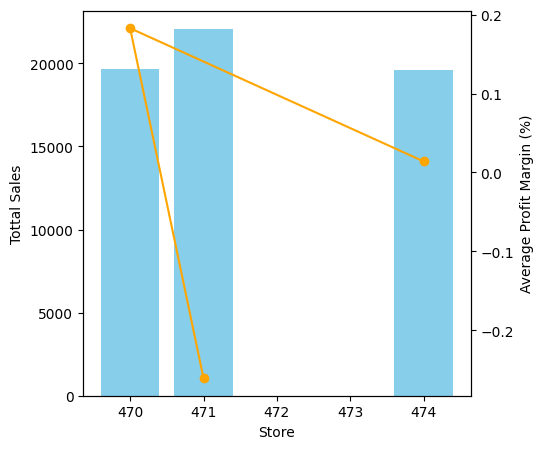

In [60]:
plt.figure(figsize = (5,5))
plt.bar(top_stores['store'],top_stores['total_sales'],color= 'skyblue')
plt.xlabel('Store')
plt.ylabel('Tottal Sales')
plt.twinx()
plt.plot(top_stores['store'], top_stores['avg_profit_margin'], color = 'orange', marker = 'o', label = 'Profit Margin')
plt.ylabel('Average Profit Margin (%)')

# The task also included creating synthetic dataset representing daily total sales by store and department.

the dataset should include date, store, department code, daily_sales.

let's extract a dataset from our filtered_dataset

In [61]:
daily_sales_data = (
    filtered_dataset.groupby(['date', 'store', 'department_code'])['unit_price']
    .sum()
    .reset_index()
)
daily_sales_data.rename(columns={'unit_price': 'daily_sales'}, inplace=True)


In [62]:
daily_sales_data

,date,store,department_code,daily_sales
0,2024-12-18,65.0,1.0,23.317371
1,2024-12-18,65.0,2.0,3.580000
2,2024-12-18,65.0,5.0,146.881599
3,2024-12-18,65.0,29.0,33.980000
4,2024-12-18,65.0,31.0,32.987200
...,...,...,...,...
922,2024-12-24,493.0,33.0,226.564228
923,2024-12-24,493.0,39.0,224.563885
924,2024-12-24,493.0,46.0,410.437941
925,2024-12-24,493.0,48.0,154.400000


Because each store has products from various departments,  counted them independly , daily sales for each department in each store.